In [1]:
from db.mongo import QueryMongo
from data.pre_processing_data import PreRating
from ratings.rating import AlgoritmoRating
from ratings.radar_stats import RadarStats
from plot.funcoes import PlotFuncoes
from plot.plot_radar import Radar
from plot.quadro_dados import PlotStatsQuadro
from aux.translate_positions import translate

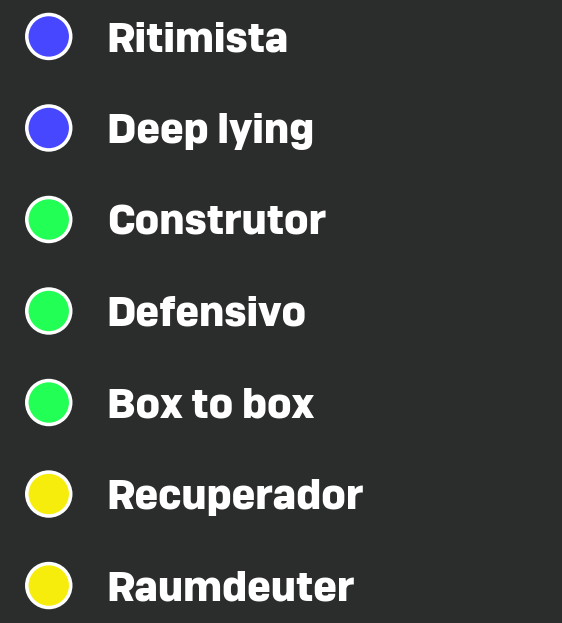

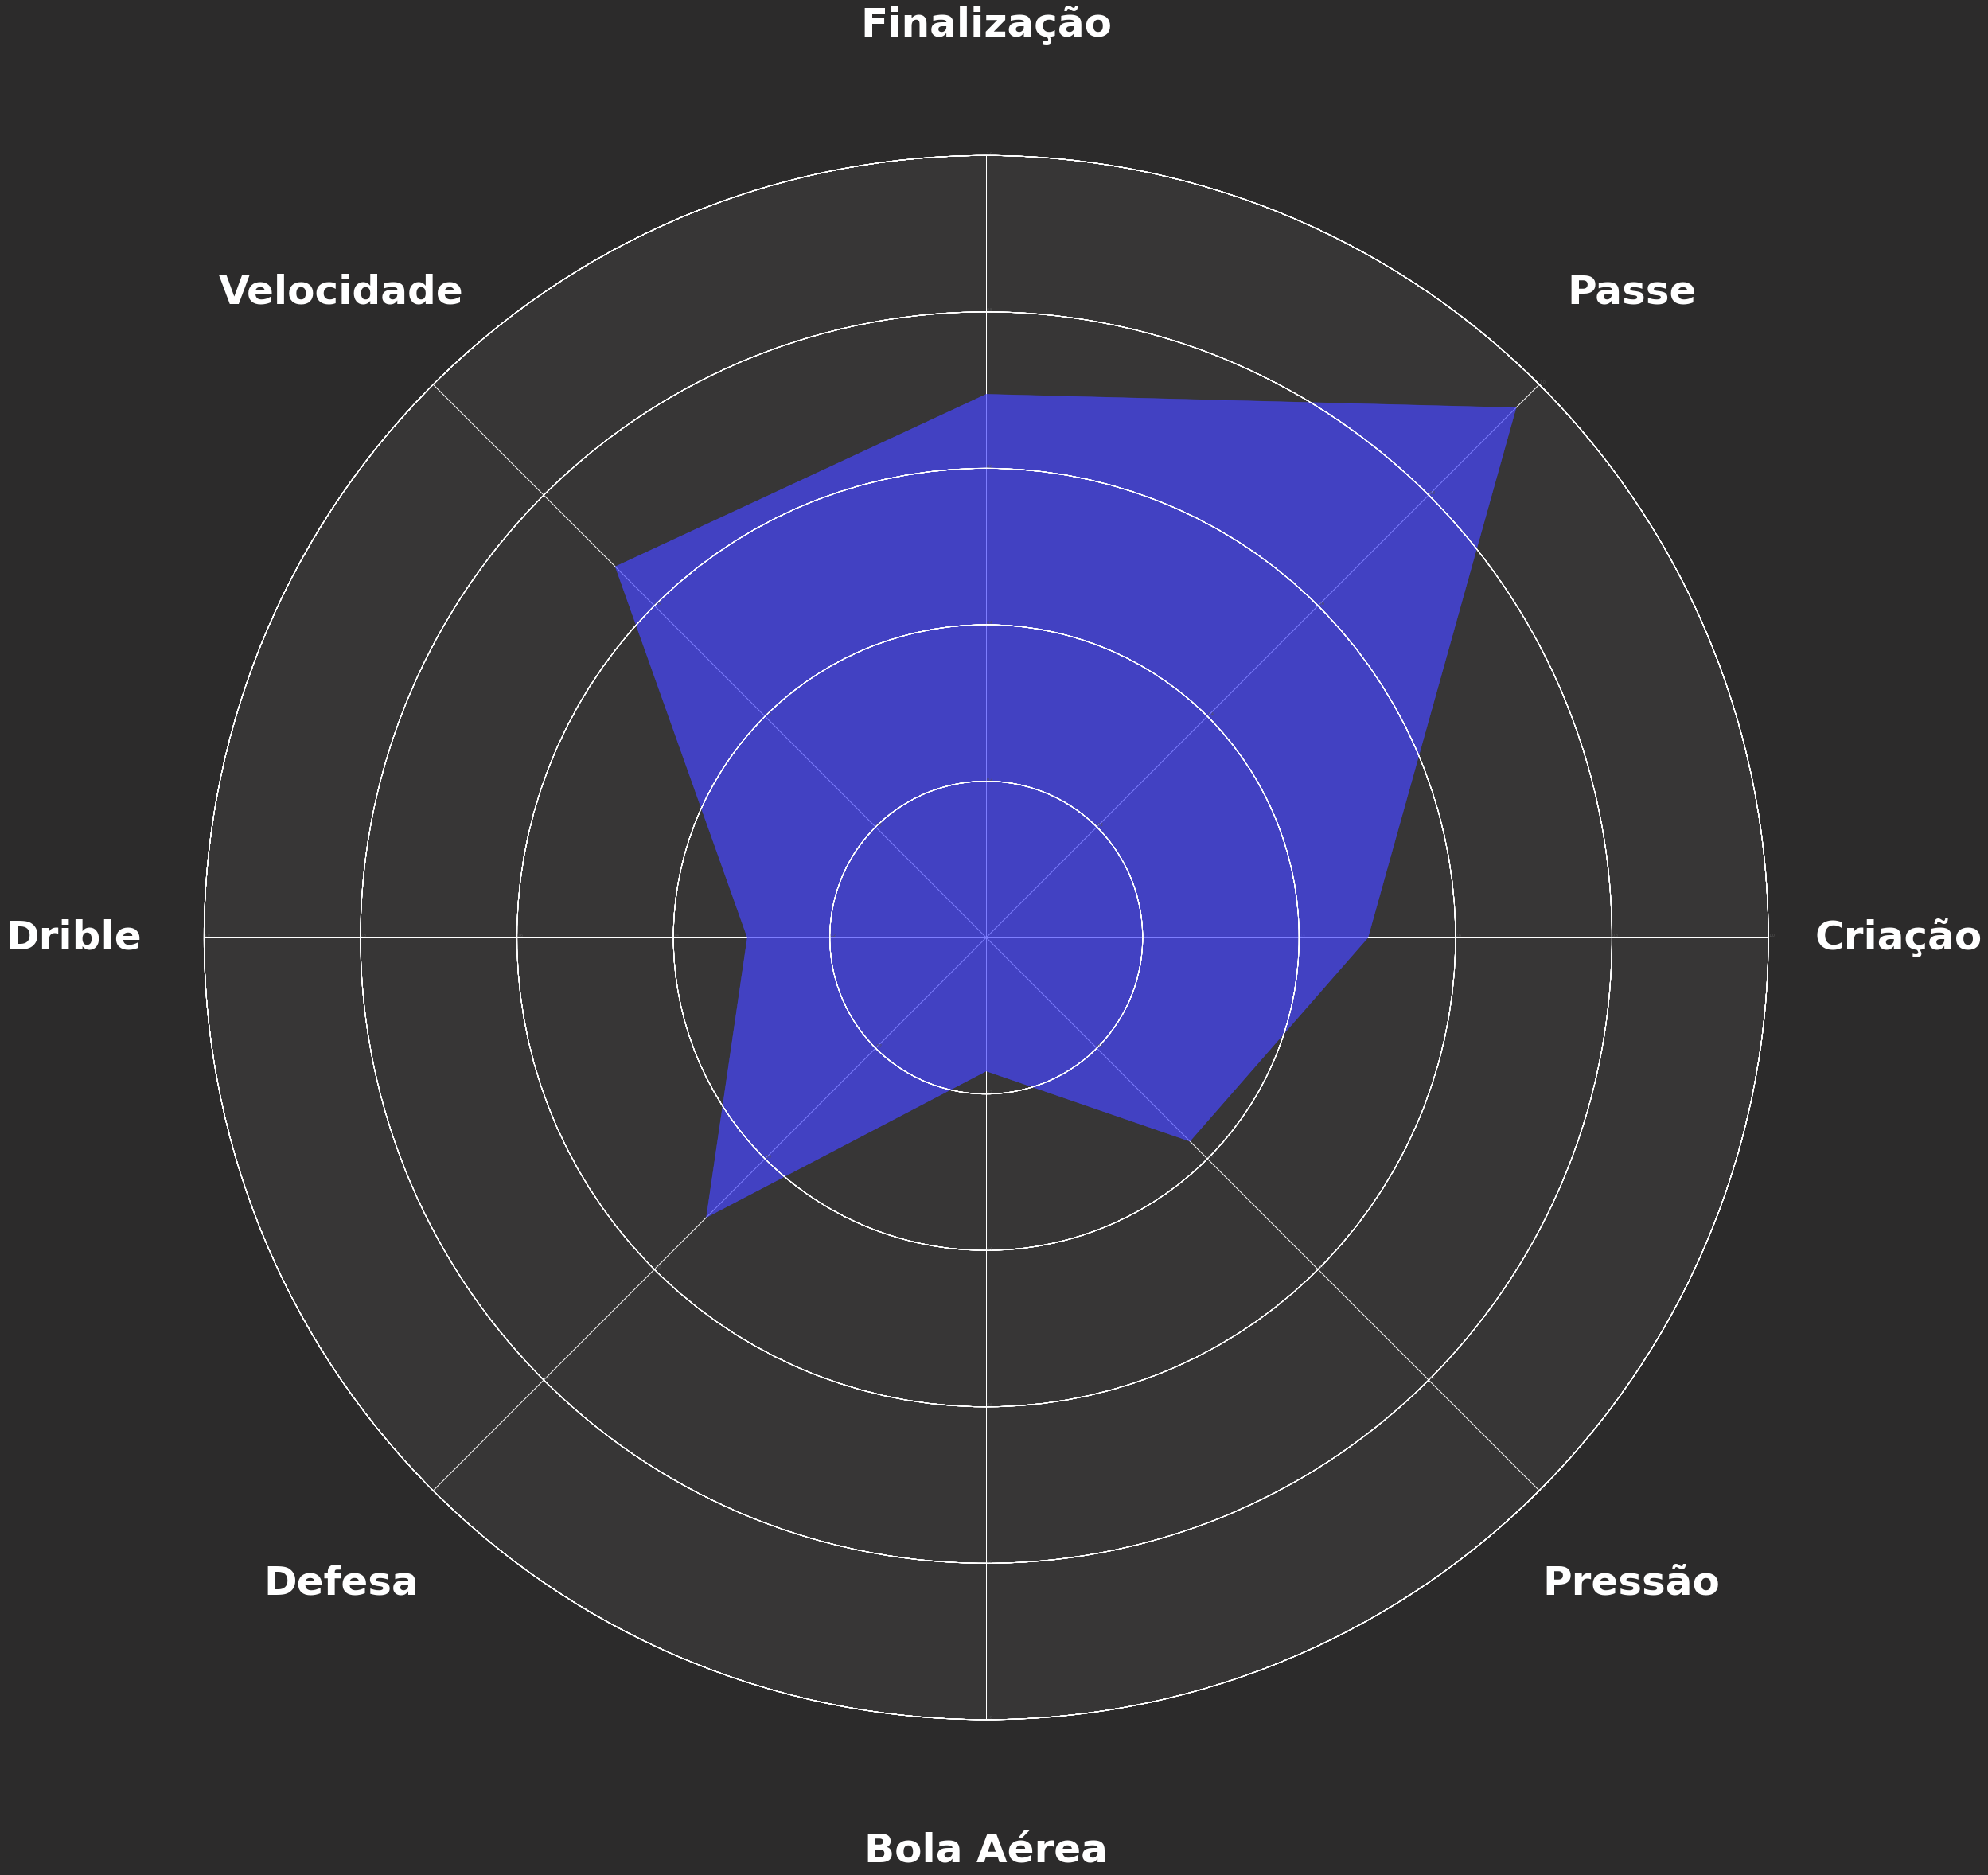

In [2]:
from services.player_algoritmo import Algoritmo
season_id = -3306
position = 'Volante'
player_id = 411698

algoritmo = Algoritmo(season_id, position)
algoritmo.get_funcoes(player_id)
algoritmo.get_radar(player_id)
algoritmo.get_stats_quadro(player_id)

## SEPARADO PARA PERSONALIZAR CORES 

In [5]:
position = 'Meio Campista'
player_id = 247639

In [6]:
query = QueryMongo()
df = query.general_query(
    db='footure_stats', collection='general_stats', 
    search_filter={'season_id': -3306, 'primary_position': position}
                   )

In [7]:
data_process = PreRating(df, position)
df_algoritmo = data_process.data_normalize()
df_info = data_process.get_info()

In [13]:
if position == 'Atacante':
    df_output_algoritmo = AlgoritmoRating(df_algoritmo).algoritmo_atacante()
if position == 'Volante':
   df_output_algoritmo = AlgoritmoRating(df_algoritmo).algoritmo_volante()

if position == 'Extremo':
    df_output_algoritmo = AlgoritmoRating(df_algoritmo).algoritmo_extremo()

if position == 'Meio Campista':
    df_output_algoritmo = AlgoritmoRating(df_algoritmo).algoritmo_meio_campo()

if position == 'Lateral Esquerdo':
    df_output_algoritmo = AlgoritmoRating(df_algoritmo).algoritmo_lateral()

if position == 'Lateral direito':
    df_output_algoritmo = AlgoritmoRating(df_algoritmo).algoritmo_lateral()

if position == 'Zagueiro':
    df_output_algoritmo = AlgoritmoRating(df_algoritmo).algoritmo_zagueiro()



In [14]:
df_output_radar = RadarStats(df_algoritmo).stats()

In [15]:
df_func = df_info.join(df_output_algoritmo, how='outer')
df_radar = df_info.join(df_output_radar, how='outer')

df_funcoes_algoritmo = df_func.join(df_output_radar)

In [16]:
df_func = df_func.drop_duplicates('id').reset_index(drop=True)

In [17]:
df_func = df_info.join(df_output_algoritmo, how='outer')

## Teste plots 

findfont: Font family ['Camber-Bd'] not found. Falling back to DejaVu Sans.


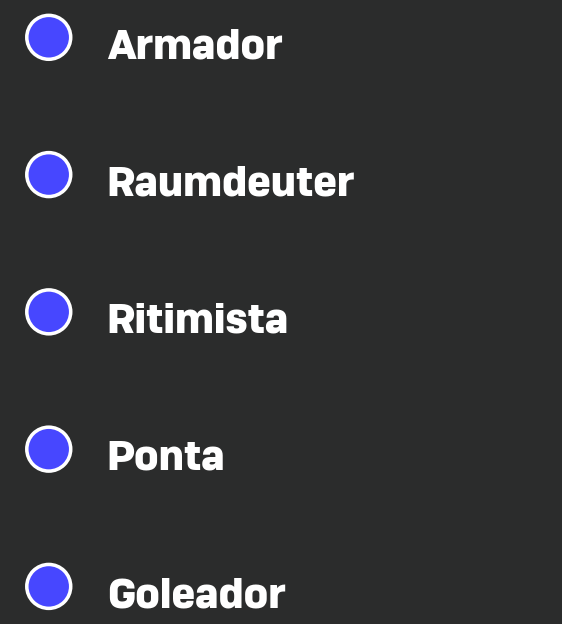

In [18]:
df_cores = df_info[['id']].join(df_output_algoritmo, how='outer')

plot_cores = PlotFuncoes()
# plot_cores.cor_fundo = 'white'
# plot_cores.cor_texto = 'black'
plot_cores.notas_funcoes(df_cores, player_id )

In [ ]:

df_radar = df_info[['id']].join(df_output_radar, how='outer')
# df_radar = df_radar.rename(columns={'Finalização': 'Shooting'})
plot_radar = Radar()
# plot_radar.cor_fundo='white'
# plot_radar.fill_color='green'
# plot_radar.cor_texto='black'
# plot_radar.cor_fundo_radar='red'
plot_radar.plot_radar(df_radar, player_id)

In [ ]:
df_colums_position = query.general_query(
    db='footure', collection='position_stats',
    search_filter={}
)


In [ ]:
import numpy as np
dic_stats_positions = {}
for idx, coluna in enumerate(list(df_colums_position.columns)):
    if idx > 0:
        rows = list(df_colums_position[coluna].dropna())
        stats = rows[0]
        try:
            stats.remove('nan')
        except:
            pass
        dic_stats_positions.update({ coluna : stats })
dic_stats_positions

In [ ]:
position_columns = df_colums_position['Atacante'][0]
df_to_quadro_stats = df[['id', 'name','playerStats_minutes_on_field'] + position_columns]
cor_return = PlotStatsQuadro().df_cor(df_to_quadro_stats,player_id)

In [ ]:
df_stats = cor_return[2].drop('id', axis=1)
df_stats = df_stats.drop('name', axis=1)
PlotStatsQuadro().arte_quadro( df_stats ,cor_return[0],'Gabigol')

In [ ]:
from services.player_algoritmo import Algoritmo
season_id = -3306
position = 'Volante'
player_id = 411698

algoritmo = Algoritmo(season_id, position)
algoritmo.get_funcoes(player_id)
algoritmo.get_radar(player_id)
algoritmo.get_stats_quadro(player_id)